# import

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
%matplotlib inline 

/home/sunild/.local/lib/python3.8/site-packages/matplotlib_inline/config.py:66: DeprecationWarning: InlineBackend._figure_formats_changed is deprecated in traitlets 4.1: use @observe and @unobserve instead.
  def _figure_formats_changed(self, name, old, new):


# pre-process

In [67]:
data=pd.read_csv('ime692_project.csv')
# avoid State and County name
cols=data.columns[2:].to_list()
data=data[cols]
# seperate data into test and train based on `Test` indicator
pd.options.mode.chained_assignment = None  # default='warn' --> to supress chain assignment warning <--
test_data=data.loc[data.Test==1] ## previous indices could be useful ##
train_data=data.loc[data.Test==0]
print("==========================================")
print("No of testing observations: ",test_data.shape[0])
print("No of training observations: ",train_data.shape[0])
print("==========================================")

# drop the indicator inplace
test_data.drop('Test',axis=1,inplace=True)
train_data.drop('Test',axis=1,inplace=True)

# sepearate predicted and regressor variables
y_test_data=test_data['CvdVax_DisparityY'].tolist()
X_test_data=test_data.drop('CvdVax_DisparityY',axis=1)
y_train_data=train_data['CvdVax_DisparityY'].tolist()
X_train_data=train_data.drop('CvdVax_DisparityY',axis=1)


No of testing observations:  225
No of training observations:  531


In [3]:
from sklearn.preprocessing import StandardScaler
scalerInst=StandardScaler()
X_train_data_normalized=scalerInst.fit_transform(X_train_data)
X_test_data_normalized=scalerInst.fit_transform(X_test_data)

# linear normal

In [4]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train_data_normalized,y_train_data)
print('R2 >>>',lm.score(X_test_data_normalized,y_test_data))

R2 >>> 0.3605625338226661


In [5]:
MSE=np.mean((lm.predict(X_test_data_normalized)-y_test_data)**2)
print('MSE >>>',MSE)

MSE >>> 68.35394429129394


Text(0, 0.5, 'Importance')

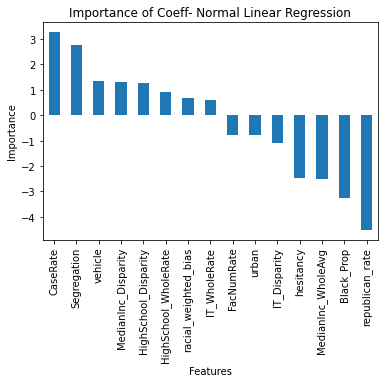

In [6]:
r = pd.DataFrame(lm.coef_.T, columns=['Weight of Coeff'], index=X_train_data.columns)
(r['Weight of Coeff'].sort_values(ascending = False)).plot.bar()
plt.title('Importance of Coeff- Normal Linear Regression')
plt.xlabel("Features")
plt.ylabel('Importance')

In [69]:
x=scalerInst.fit_transform(pd.concat([X_test_data,X_train_data],axis=0,ignore_index=True))
y=y_test_data+y_train_data

R2 >>> 0.4453689282192691
MSE >>> 59.38885169554626


Text(0, 0.5, 'Importance')

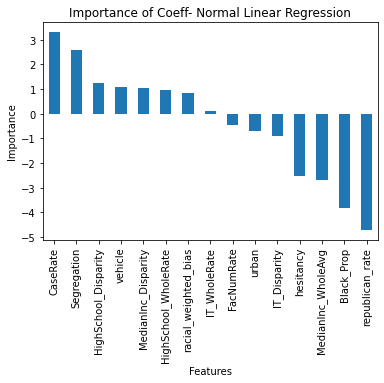

In [71]:
# lm with complete data(tain and test)
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x,y)
print('R2 >>>',lm.score(x,y))
MSE=np.mean((lm.predict(x)-y)**2)
print('MSE >>>',MSE)
r = pd.DataFrame(lm.coef_.T, columns=['Weight of Coeff'], index=X_train_data.columns)
(r['Weight of Coeff'].sort_values(ascending = False)).plot.bar()
plt.title('Importance of Coeff- Normal Linear Regression')
plt.xlabel("Features")
plt.ylabel('Importance')

In [78]:
import statsmodels.api as sm
est = sm.OLS((y_train_data), X_train_data_normalized)
est2 = est.fit()
print(est2.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.198
Model:                            OLS   Adj. R-squared (uncentered):              0.174
Method:                 Least Squares   F-statistic:                              8.471
Date:                Thu, 21 Oct 2021   Prob (F-statistic):                    1.76e-17
Time:                        12:13:10   Log-Likelihood:                         -2168.5
No. Observations:                 531   AIC:                                      4367.
Df Residuals:                     516   BIC:                                      4431.
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [23]:
np.mean((est2.predict(X_test_data_normalized)-y_test_data)**2)

207.4431638040929

- all linear, ridge, lasso, elastinet give same result
- all can be done using one function or a for loop

# elastinet

In [8]:
from sklearn.linear_model import ElasticNet,ElasticNetCV
r=np.linspace(-3,10,100)
alphas=np.power(10*np.ones(100),r)
rcv=ElasticNetCV(alphas=alphas,cv=5)
rcv.fit(X_train_data_normalized,y_train_data)
cvAlpha=rcv.alpha_
print('alpha >>>',cvAlpha)
rlm=ElasticNet(alpha=cvAlpha)
rlm.fit(X_train_data_normalized,y_train_data)
print('R2 >>>',rlm.score(X_test_data_normalized,y_test_data))
MSE=np.mean((rlm.predict(X_test_data_normalized)-y_test_data)**2)
print('MSE >>>',MSE)

alpha >>> 0.06892612104349702
R2 >>> 0.3563397047769785
MSE >>> 68.80535203107837


Text(0, 0.5, 'Importance')

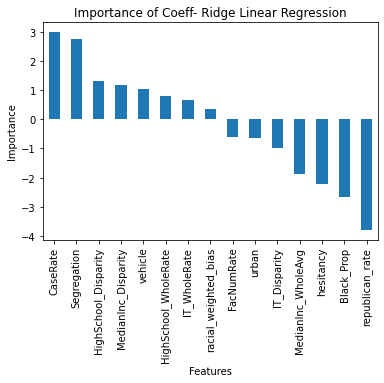

In [9]:
r = pd.DataFrame(rlm.coef_.T, columns=['Weight of Coeff'], index=X_train_data.columns)
(r['Weight of Coeff'].sort_values(ascending = False)).plot.bar()
plt.title('Importance of Coeff- Ridge Linear Regression')
plt.xlabel("Features")
plt.ylabel('Importance')

# ridge

In [14]:
from sklearn.linear_model import RidgeCV,Ridge
r=np.linspace(-3,10,100)
alphas=np.power(10*np.ones(100),r)
rcv=RidgeCV(alphas=alphas,cv=5)
rcv.fit(X_train_data_normalized,y_train_data)
cvAlpha=rcv.alpha_
print('alpha >>>',cvAlpha)
rlm=Ridge(alpha=cvAlpha)
rlm.fit(X_train_data_normalized,y_train_data)
print('R2 >>>',rlm.score(X_test_data_normalized,y_test_data))
MSE=np.mean((rlm.predict(X_test_data_normalized)-y_test_data)**2)
print('MSE >>>',MSE)

alpha >>> 39.442060594376564
R2 >>> 0.35040969731597005
MSE >>> 69.43925201516895


Text(0, 0.5, 'Importance')

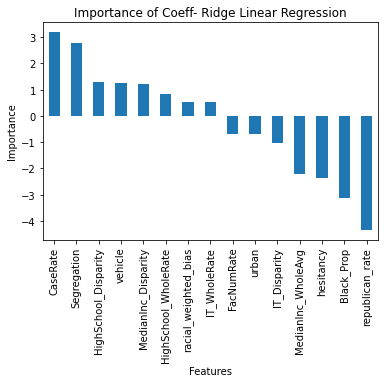

In [17]:
r = pd.DataFrame(rlm.coef_.T, columns=['Weight of Coeff'], index=X_train_data.columns)
(r['Weight of Coeff'].sort_values(ascending = False)).plot.bar()
plt.title('Importance of Coeff- Ridge Linear Regression')
plt.xlabel("Features")
plt.ylabel('Importance')

# lasso

In [18]:
from sklearn.linear_model import Lasso,LassoCV
r=np.linspace(-3,10,100)
alphas=np.power(10*np.ones(100),r)
rcv=LassoCV(alphas=alphas,cv=5)
rcv.fit(X_train_data_normalized,y_train_data)
cvAlpha=rcv.alpha_
print('alpha >>>',cvAlpha)
rlm=Lasso(alpha=cvAlpha)
rlm.fit(X_train_data_normalized,y_train_data)
print('R2 >>>',rlm.score(X_test_data_normalized,y_test_data))
MSE=np.mean((rlm.predict(X_test_data_normalized)-y_test_data)**2)
print('MSE >>>',MSE)

alpha >>> 0.037649358067924694
R2 >>> 0.3616769518949525
MSE >>> 68.23481634703123


Text(0, 0.5, 'Importance')

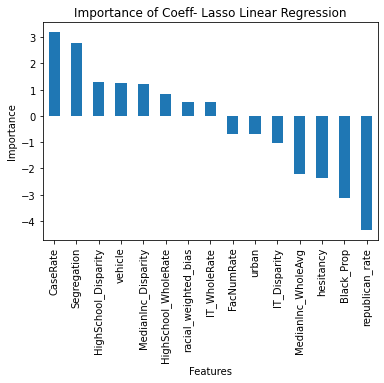

In [19]:
r = pd.DataFrame(rlm.coef_.T, columns=['Weight of Coeff'], index=X_train_data.columns)
(r['Weight of Coeff'].sort_values(ascending = False)).plot.bar()
plt.title('Importance of Coeff- Lasso Linear Regression')
plt.xlabel("Features")
plt.ylabel('Importance')

# random forest

In [22]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(random_state=1) # to reproduce results
rfr.fit(X_train_data_normalized,y_train_data)
print('R2 >>>',rfr.score(X_test_data_normalized,y_test_data))
MSE=np.mean((rfr.predict(X_test_data_normalized)-y_test_data)**2)
print('MSE >>>',MSE)

R2 >>> 0.4250175946019502
MSE >>> 61.46389191426086


Text(0, 0.5, 'Importance')

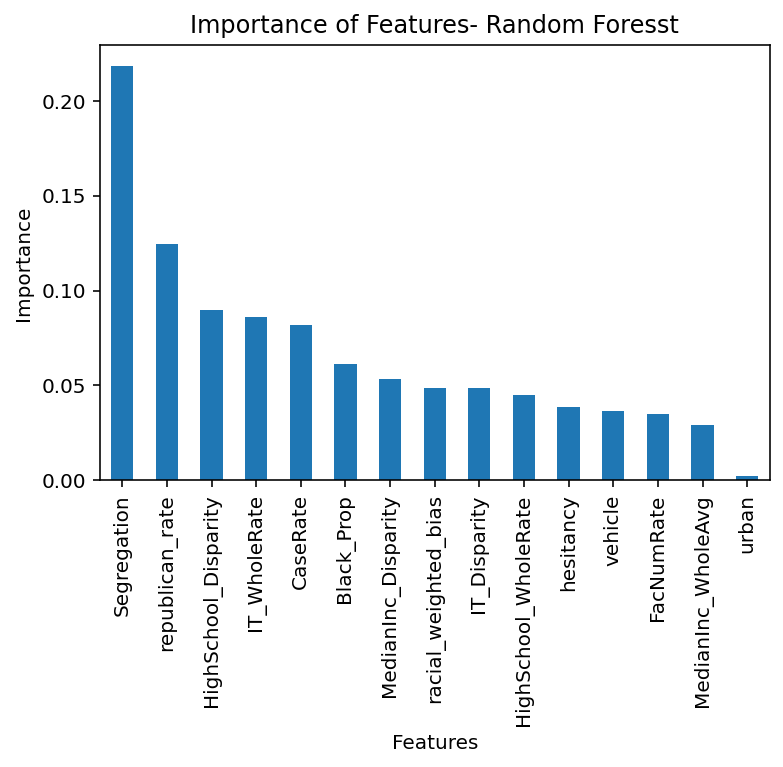

In [60]:
r = pd.DataFrame(rfr.feature_importances_.T, columns=['Weight of Coeff'], index=X_train_data.columns)
(r['Weight of Coeff'].sort_values(ascending = False)).plot.bar()
plt.title('Importance of Features- Random Foresst')
plt.xlabel("Features")
plt.ylabel('Importance')

- no improvment even with ridge regression with cv

# SVM

In [48]:
from sklearn.svm import SVR

In [56]:
# calling model
test_model = SVR(kernel='linear')
# fitting  model
test_model.fit(X_train_data_normalized,y_train_data)

SVR(kernel='linear')

In [69]:
y_pred = test_model.predict(X_test_data_normalized)
print("======= TEST SET =======")
print("The Score is: ", test_model.score(X_test_data_normalized,y_test_data))
print("The MSE Error is: ", np.mean((y_pred-y_test_data)**2))
print("============================================================")
y_pred = test_model.predict(X_train_data_normalized)
print("======= TRANING SET =======")
print("The Score is: ", test_model.score(X_train_data_normalized,y_train_data))
print("The MSE Error is: ", np.mean((y_pred-y_train_data)**2))
print("============================================================")

======= TEST SET =======
The Score is:  0.3613498690290846
The MSE Error is:  68.26978052284942
======= TRANING SET =======
The Score is:  0.45615614335830923
The MSE Error is:  58.24263809683359


Text(0, 0.5, 'Importance')

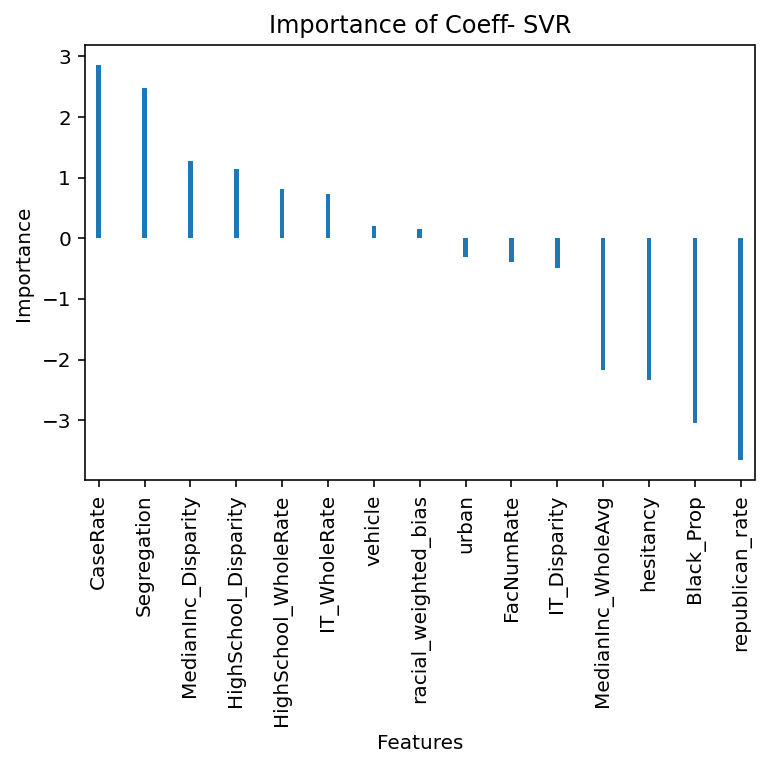

In [62]:
r = pd.DataFrame(test_model.coef_.T, columns=['Weight of Coeff'], index=X_train_data.columns)
(r['Weight of Coeff'].sort_values(ascending = False)).plot.bar(width=0.1)
plt.title('Importance of Coeff- SVR')
plt.xlabel("Features")
plt.ylabel('Importance')

In [122]:
# optimizing the parameter C in SVC
C=[0.01,0.1,1,10,100,1000]
train_score = []
test_score = []
train_error=[]
test_error=[]
for c in C:
    rsvm=SVR(kernel='linear', C=c).fit(X_train_data_normalized,y_train_data)
    train_score.append(rsvm.score(X_train_data_normalized,y_train_data))
    test_score.append(rsvm.score(X_test_data_normalized, y_test_data))
    train_error.append(np.mean((rsvm.predict(X_train_data_normalized)-y_train_data)**2))
    test_error.append(np.mean((rsvm.predict(X_test_data_normalized)-y_test_data)**2))

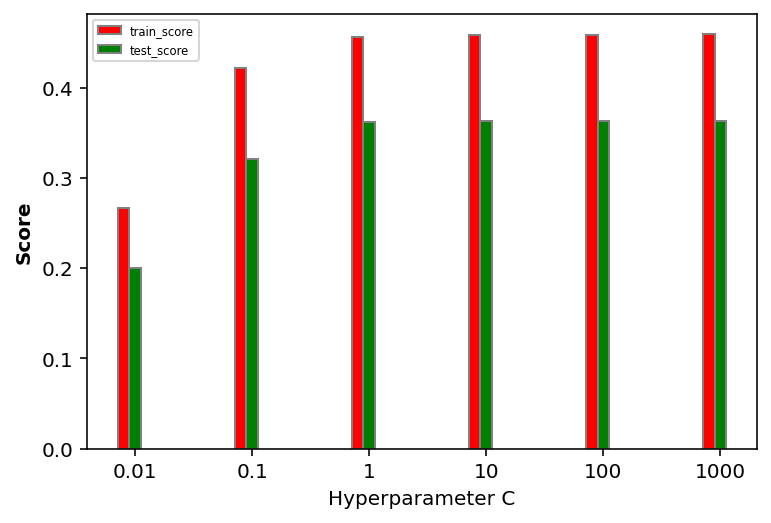

In [123]:
br1 = np.arange(len(C)) 
barWidth=0.1
br2 = [x + barWidth for x in br1] 
   
# Make the plot 
plt.bar(br1, train_score, color ='r', width = barWidth, 
        edgecolor ='grey', label ='train_score') 
plt.bar(br2, test_score, color ='g', width = barWidth, 
        edgecolor ='grey', label ='test_score') 

   
# Adding Xticks  
plt.xlabel('Hyperparameter C') 
plt.ylabel('Score', fontweight ='bold') 
plt.xticks([r + barWidth for r in range(len(train_score))], 
           C) 
plt.legend(fontsize='xx-small')   
plt.show()

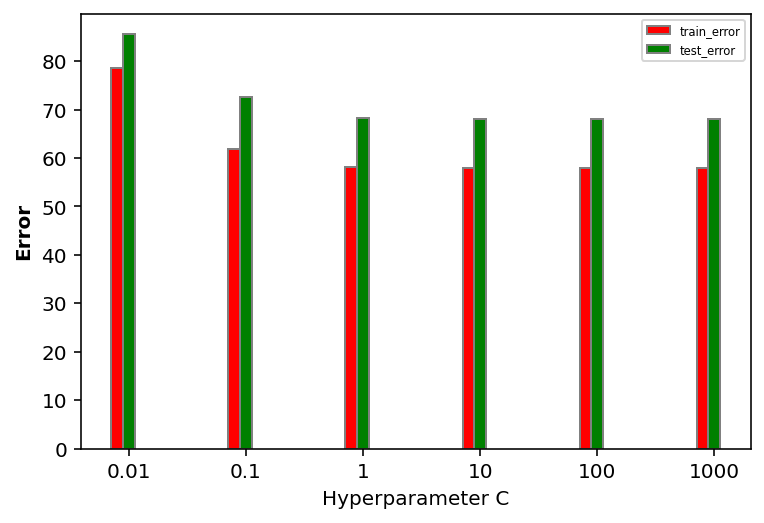

In [124]:
# Make the plot 
plt.bar(br1, train_error, color ='r', width = barWidth, 
        edgecolor ='grey', label ='train_error') 
plt.bar(br2, test_error, color ='g', width = barWidth, 
        edgecolor ='grey', label ='test_error') 

   
# Adding Xticks  
plt.xlabel('Hyperparameter C') 
plt.ylabel('Error', fontweight ='bold') 
plt.xticks([r + barWidth for r in range(len(train_error))], 
           C) 
plt.legend(fontsize='xx-small')   
plt.show()

In [118]:
for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
    t=SVR(kernel=kernel,C=10)
    t.fit(X_train_data_normalized,y_train_data)
    print(kernel,' >>>',np.mean((t.predict(X_test_data_normalized)-y_test_data)**2),' ||| ',t.score(X_test_data_normalized,y_test_data))

linear  >>> 68.1337054714098  |||  0.36262282389664424
poly  >>> 76.01892334803212  |||  0.28885818907474725
rbf  >>> 61.40884234779096  |||  0.4255325722767962
sigmoid  >>> 1386.0189926380065  |||  -11.965930231461268


- rbf with C=10 is doing better than linear

In [125]:
def mseCalc(obs,preds):
    return np.mean((obs-preds)**2)

# KNN

In [129]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [140]:
# calling model
test_model = KNeighborsRegressor() # p=1 manhattan, p=2 euclid
# fitting  model
test_model.fit(X_train_data_normalized,y_train_data)

KNeighborsRegressor()

In [141]:

y_pred = test_model.predict(X_test_data_normalized)
print("======= TEST SET =======")
print("The Score is: ", test_model.score(X_test_data_normalized,y_test_data))
print("The MSE Error is: ", np.mean((y_pred-y_test_data)**2))
print("============================================================")
y_pred = test_model.predict(X_train_data_normalized)
print("======= TRANING SET =======")
print("The Score is: ", test_model.score(X_train_data_normalized,y_train_data))
print("The MSE Error is: ", np.mean((y_pred-y_train_data)**2))
print("============================================================")

======= TEST SET =======
The Score is:  0.3370305377367637
The MSE Error is:  70.86944398375744
======= TRANING SET =======
The Score is:  0.6321240061692843
The MSE Error is:  39.39746328202404


In [165]:
# optimizing the value of k
train_error = []
test_error = []
train_score = []
test_score = []
for n in range(3,20):
    knnr=KNeighborsRegressor(n_neighbors=n).fit(X_train_data_normalized,y_train_data)
    train_score.append(1-knnr.score(X_train_data_normalized,y_train_data))
    test_score.append(1-knnr.score(X_test_data_normalized, y_test_data))
    train_error.append(np.mean((knnr.predict(X_train_data_normalized)-y_train_data)**2))
    test_error.append(np.mean((knnr.predict(X_test_data_normalized)-y_test_data)**2))

In [161]:
import seaborn as sns

Text(0.5, 1.0, 'Score on Train and Test Set for Different values of K')

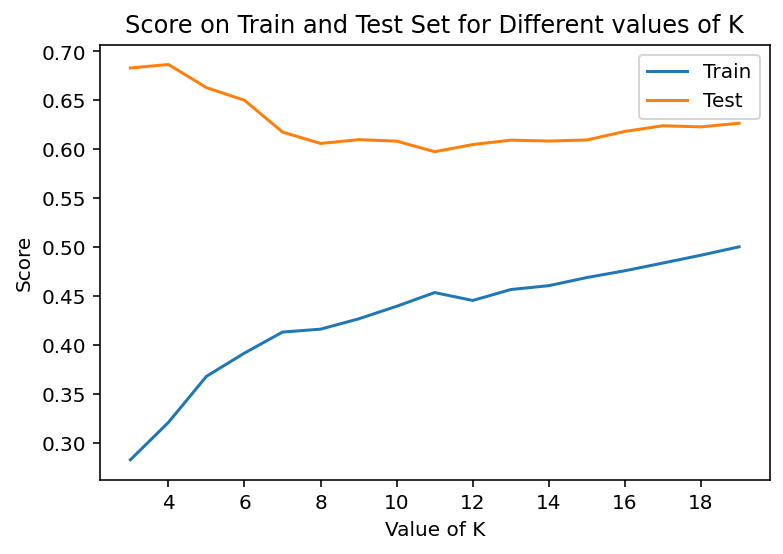

In [166]:
sns.lineplot(y = train_score, x = range(3,20), label ='Train')
sns.lineplot(y = test_score, x = range(3,20), label = 'Test')
plt.xlabel('Value of K')
plt.ylabel('Score')
plt.title("Score on Train and Test Set for Different values of K")

Text(0.5, 1.0, 'Error on Train and Test Set for Different values of K')

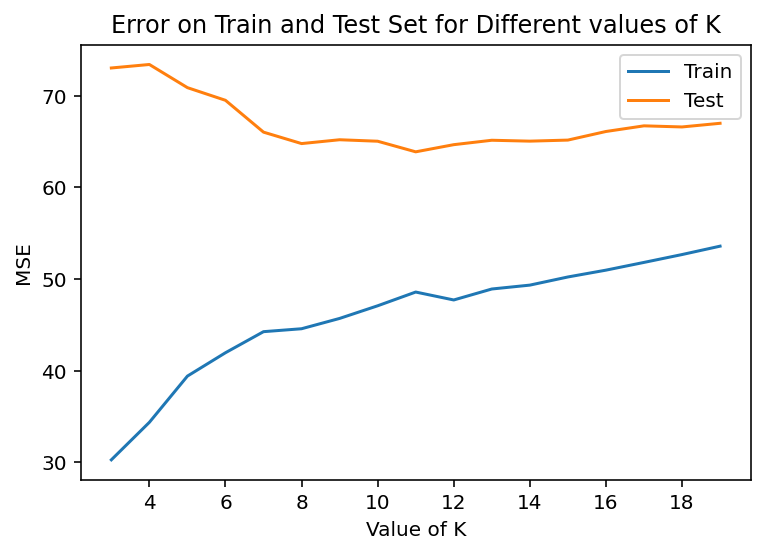

In [156]:
sns.lineplot(y = train_error, x = range(3,20), label ='Train')
sns.lineplot(y = test_error, x = range(3,20), label = 'Test')
plt.xlabel('Value of K')
plt.ylabel('MSE')
plt.title("Error on Train and Test Set for Different values of K")

- I guess (1-score)*100 is same as MSE :: almost
- use MSE as measure for all

## need to optimize on one of the method/algo

- hyperpara(methods have different hyperparas) tweaks
- crossvalidation

# feature importance

In [189]:
def heatmap(thers):
    corr_matrix = X_train_data.corr()
    corr_matrix=corr_matrix[(corr_matrix>thers) | (corr_matrix<-thers)] # only selecte relations stronger than thersold
    mask = np.zeros_like(corr_matrix,dtype=np.bool)
    mask[np.triu_indices_from(mask)]= True

    f, ax = plt.subplots(figsize=(20, 20))

    heatmap = sns.heatmap(corr_matrix,
                        mask = mask,
                        square = True,
                        linewidths = .5,
                        cmap = 'coolwarm',
                        cbar_kws = {'shrink': .4,
                                    'ticks' : [-1, -0.5, 0, 0.5, 1]},
                        vmin = -1,
                        vmax = 1,
                        annot = True,
                        annot_kws = {'size': 12})

    #add the column names as labels
    ax.set_yticklabels(corr_matrix.columns, rotation = 0)
    ax.set_xticklabels(corr_matrix.columns)
    ax.set_title("Correlation Heatmap of Training Data",fontsize=18)
    sns.set_style({'xtick.bottom': True}, {'ytick.left': True})
    # f.savefig('correlation.jpg')

- does not seem that interesting
- alsthough hesitency and republic rate seems intutive :)
- also High school rate is haveing effect on IT rate and median Income
- it can be said that most inputs are NOT STRONGLY RELATED

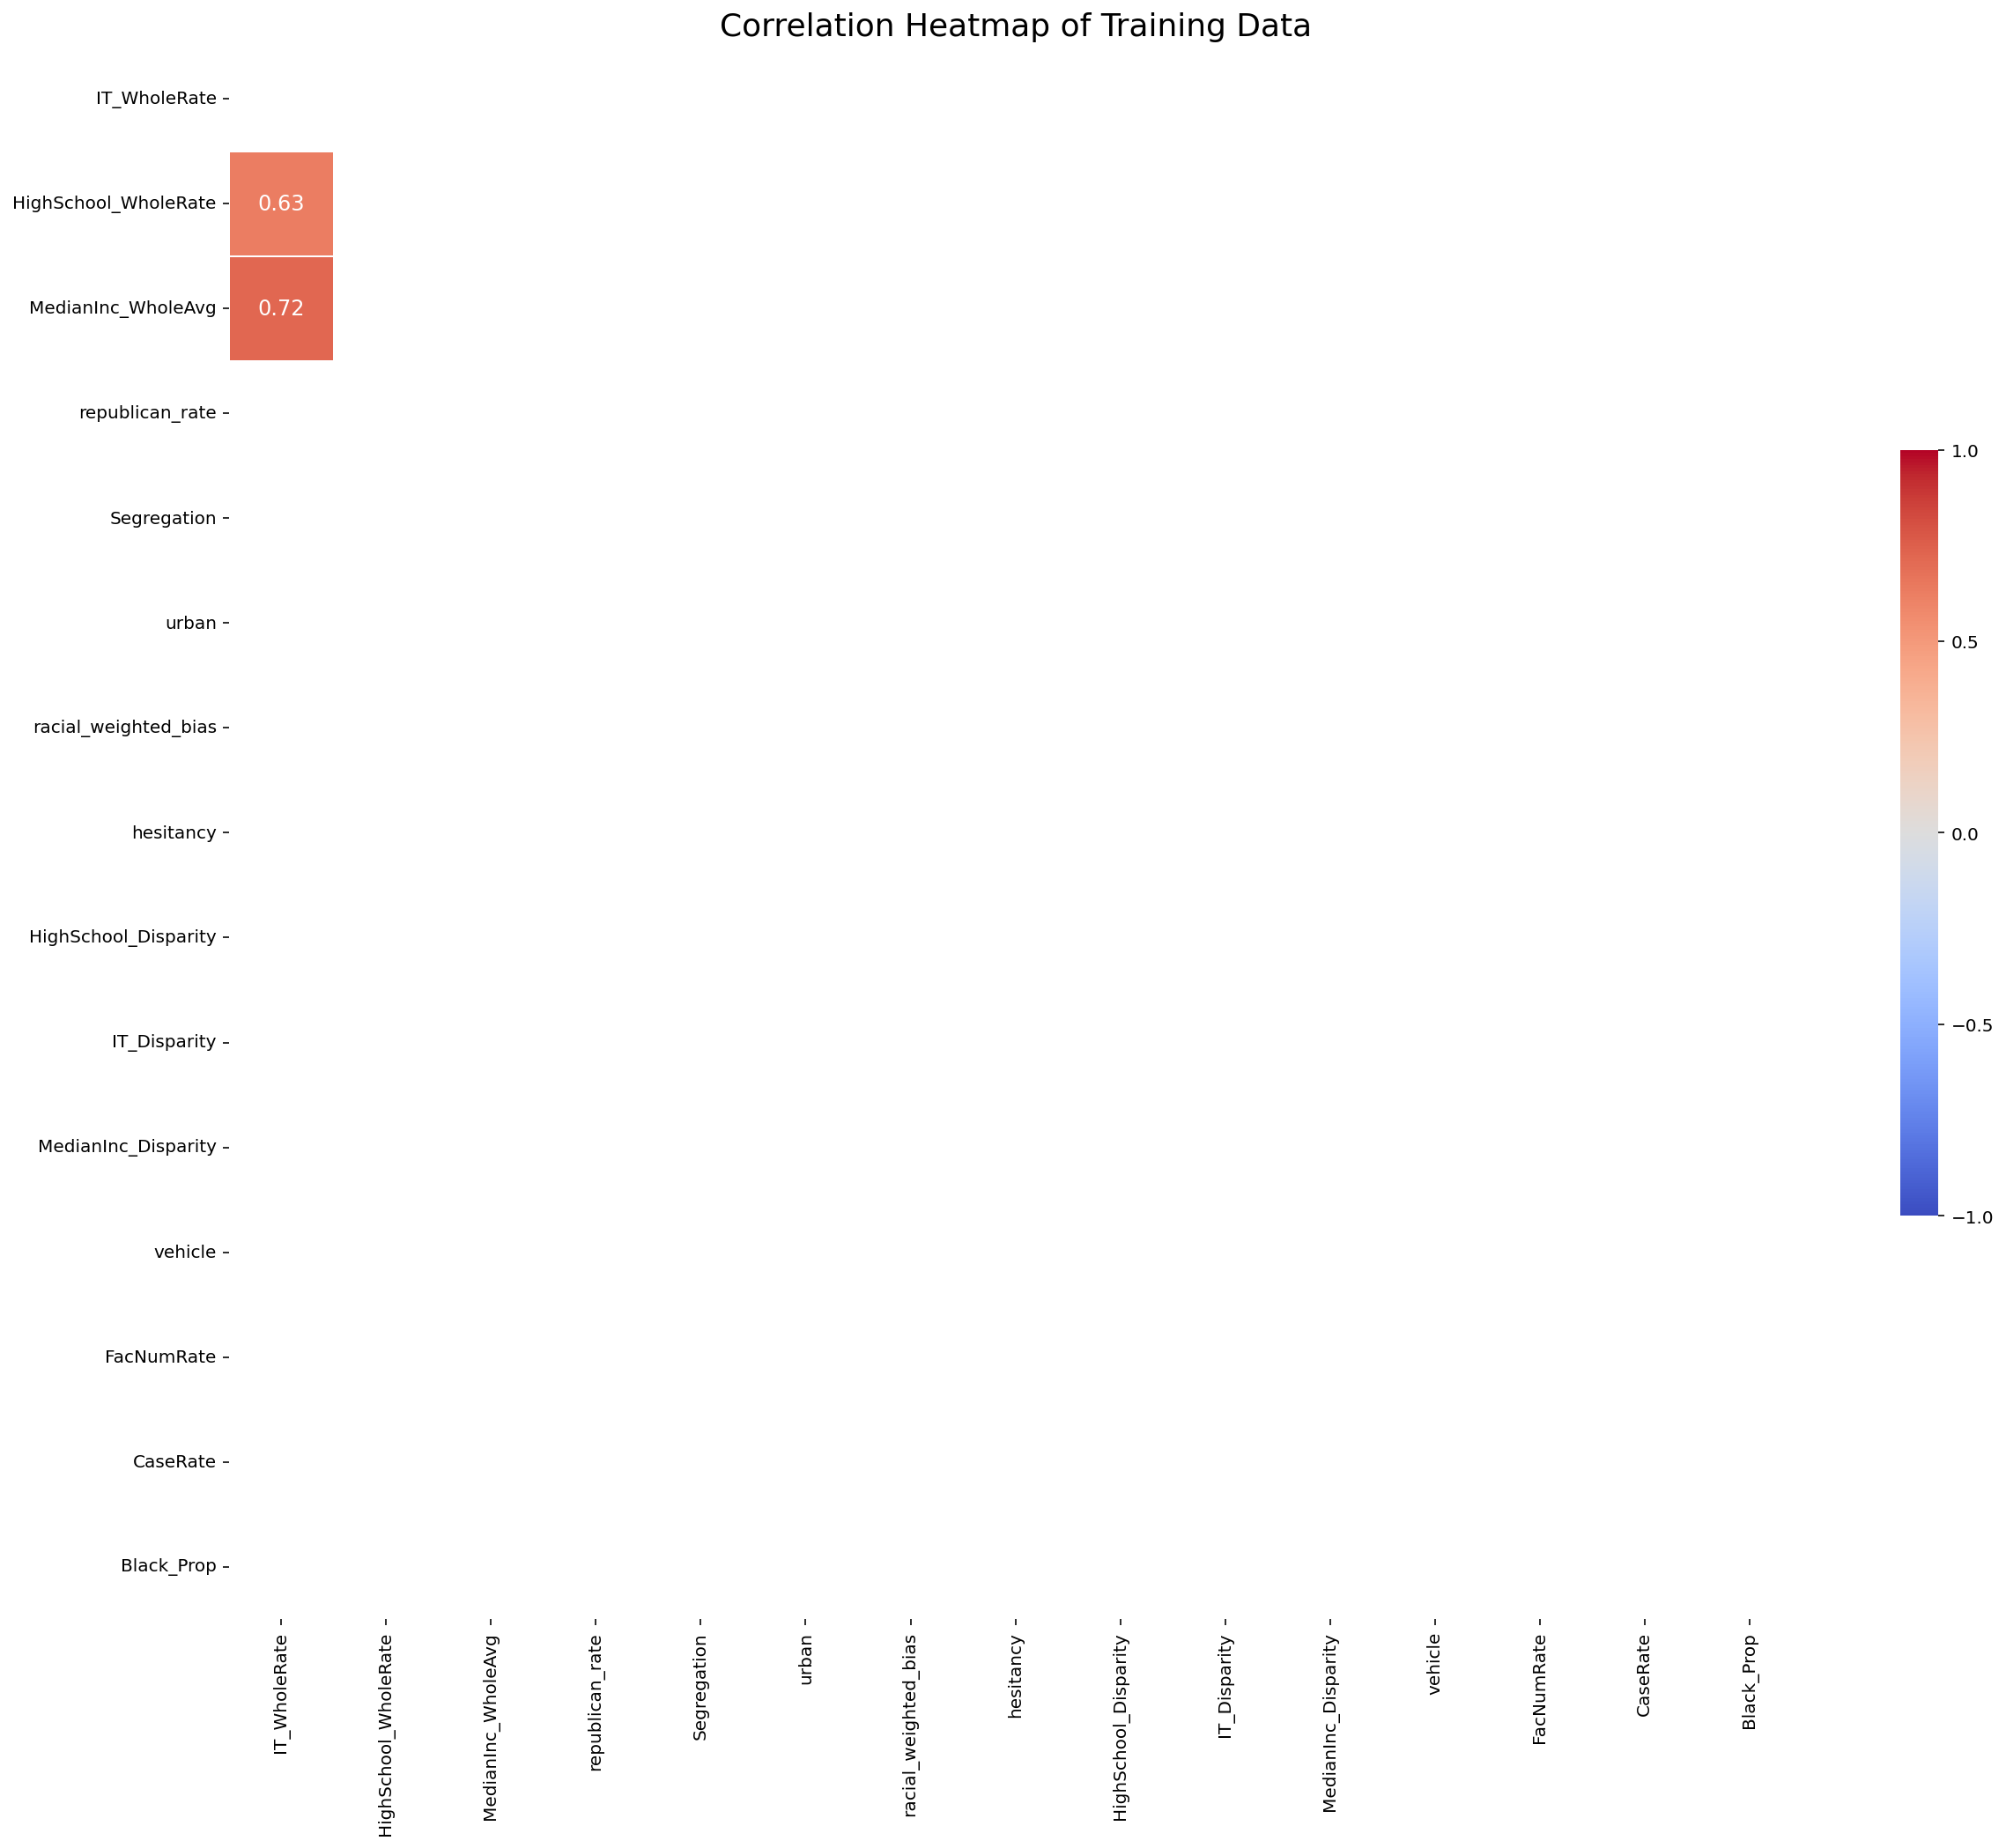

In [190]:
heatmap(0.6)

# xgboost